In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_curve

In [2]:
leads=pd.read_csv('Leads.csv')

In [3]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [5]:
leads.shape

(9240, 37)

In [6]:
#checking converted rate
leads['Converted'].sum()/len(leads['Converted'].index)*100
#We have around 39% convertion right now

38.53896103896104

### Data Cleaning

In [7]:
cols_null_percentags=100*leads.isnull().sum()/len(leads.index)  
cols_null_percentags

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
#dropping columns with more than 27% missing values 
to_delete_cols=cols_null_percentags[cols_null_percentags>27]
leads.drop(columns=list(to_delete_cols.index),inplace=True)  #droping columns with missing values>27%
to_drop_rows=cols_null_percentags[(cols_null_percentags>0) & (cols_null_percentags<2)] #columns to drop
to_impute_rows=cols_null_percentags[(cols_null_percentags>2) & (cols_null_percentags<17)] #columns to drop


In [9]:
to_impute_rows

Specialization    15.562771
City              15.367965
dtype: float64

In [10]:
to_drop_rows

Lead Source             0.389610
TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
dtype: float64

### Imputations (Missing Value Treatment)

In [11]:
#before null value treatment
print('Null values in Lead Source: ', leads['Lead Source'].isnull().sum())
print('Null values in Last Activity: ', leads['Last Activity'].isnull().sum())
print('Null values in TotalVisits: ', leads['TotalVisits'].isnull().sum())
print('Null values in Page Views Per Visit: ', leads['Page Views Per Visit'].isnull().sum())
print('Null values in Specialization: ', leads['Specialization'].isnull().sum())
print('Null values in City: ', leads['City'].isnull().sum())

Null values in Lead Source:  36
Null values in Last Activity:  103
Null values in TotalVisits:  137
Null values in Page Views Per Visit:  137
Null values in Specialization:  1438
Null values in City:  1420


In [12]:
#dropping rows from columns with low null percentage

leads.dropna(subset=list(to_drop_rows.index),inplace=True)


In [13]:
#imputation
print('Mode before in Specialization: ',leads['Specialization'].mode())
print('Mode before in City: ',leads['City'].mode())
print()
print("Since 'Select' is coming as a mode value in specialization, we need to replace 'Select' with np.Nan")
print()
leads['Specialization']=leads['Specialization'].replace('Select', np.nan)
print('Mode After in Specialization: ',leads['Specialization'].mode())
print('Mode After in City: ',leads['City'].mode())

Mode before in Specialization:  0    Select
dtype: object
Mode before in City:  0    Mumbai
dtype: object

Since 'Select' is coming as a mode value in specialization, we need to replace 'Select' with np.Nan

Mode After in Specialization:  0    Finance Management
dtype: object
Mode After in City:  0    Mumbai
dtype: object


In [14]:
#imputing null values with mode
leads['Specialization'].fillna(leads['Specialization'].mode()[0],inplace=True)
leads['City'].fillna(leads['City'].mode()[0],inplace=True)


In [15]:
leads['Specialization'].value_counts()

Finance Management                   4241
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [16]:
#after treatment
print('Null values in Lead Source: ', leads['Lead Source'].isnull().sum())
print('Null values in Last Activity: ', leads['Last Activity'].isnull().sum())
print('Null values in TotalVisits: ', leads['TotalVisits'].isnull().sum())
print('Null values in Page Views Per Visit: ', leads['Page Views Per Visit'].isnull().sum())
print('Null values in Specialization: ', leads['Specialization'].isnull().sum())
print('Null values in City: ', leads['City'].isnull().sum())

Null values in Lead Source:  0
Null values in Last Activity:  0
Null values in TotalVisits:  0
Null values in Page Views Per Visit:  0
Null values in Specialization:  0
Null values in City:  0


In [17]:
#Treating 'Select' values in column as null

#finding columns with 'Select' in rows
cols=list(leads.dtypes[leads.dtypes.values=='object'].index)
cols_having_select=[]
for i in cols:
    for j in list(leads[i].value_counts().index):
        if j.lower()=='select':
            cols_having_select.append(i)
        

In [18]:
#checking the columns having Select
for i in cols_having_select:
    print(f"Column: {i}")
    print('-------------------')
    print(leads[i].value_counts()/len(leads[i].index)*100)
    print()

Column: How did you hear about X Education
-------------------
Select                   53.846154
Online Search             8.904562
Word Of Mouth             3.824113
Student of SomeSchool     3.416354
Other                     2.049813
Multiple Sources          1.675116
Advertisements            0.771435
Social Media              0.727353
Email                     0.286533
SMS                       0.253471
Name: How did you hear about X Education, dtype: float64

Column: City
-------------------
Mumbai                         50.650209
Select                         23.760194
Thane & Outskirts               8.210271
Other Cities                    7.493939
Other Cities of Maharashtra     4.915142
Other Metro Cities              4.154728
Tier II Cities                  0.815517
Name: City, dtype: float64



In [19]:
#Dropping columns with 'Select' values greater than 50% and treating the ones lesser than 50%
leads.drop(columns=['How did you hear about X Education'],inplace=True)
leads['City']=leads['City'].apply(lambda x: 'Other Cities' if x=='Select' else x)
#Also, Replacing normalizing the lead source column
leads['Lead Source'].replace('google', 'Google', inplace=True)

In [20]:
#checking
leads['City'].value_counts()

Mumbai                         4596
Other Cities                   2836
Thane & Outskirts               745
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [21]:
#for checking the skewness in data and overview
leads.profile_report()

In [22]:
#dropping Highly skewed columns
#country is highly skewed and have missing values >25%
leads.drop(columns=['Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content'
       , 'I agree to pay the amount through cheque','Do Not Call','Do Not Email','Country'],inplace=True)



In [23]:
#dropping Prospect ID and Lead Number because they wont contribute anything
leads.drop(columns=['Prospect ID','Lead Number'],inplace=True)

In [24]:
print('Null value check: ')
print('-------------------')
print(leads.isnull().sum())

Null value check: 
-------------------
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64


In [25]:
leads1=leads.copy()
leads1.drop_duplicates(inplace=True) 
leads1.shape #final row count

(7204, 11)

### Data Preparation

In [26]:
leads1.dtypes

Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
City                                       object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [27]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads1[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','City','A free copy of Mastering The Interview','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads1 = pd.concat([leads1, dummy1], axis=1)

In [28]:
#droping repeated columns
leads1.drop(columns=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','City','A free copy of Mastering The Interview','Last Notable Activity'],inplace=True)

In [29]:
leads1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7204 entries, 0 to 9239
Data columns (total 80 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Converted                                           7204 non-null   int64  
 1   TotalVisits                                         7204 non-null   float64
 2   Total Time Spent on Website                         7204 non-null   int64  
 3   Page Views Per Visit                                7204 non-null   float64
 4   Lead Origin_Landing Page Submission                 7204 non-null   uint8  
 5   Lead Origin_Lead Add Form                           7204 non-null   uint8  
 6   Lead Origin_Lead Import                             7204 non-null   uint8  
 7   Lead Source_Direct Traffic                          7204 non-null   uint8  
 8   Lead Source_Facebook                                7204 non-null   uint8  
 9

#### Outlier Treatment

In [30]:
# Checking for outliers in the continuous variables
leads1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

TotalVisits  Total Time Spent on Website  Page Views Per Visit
0             0.0                            0                  0.00
1             5.0                          674                  2.50
2             2.0                         1532                  2.00
3             1.0                          305                  1.00
4             2.0                         1428                  1.00
5             0.0                            0                  0.00
6             2.0                         1640                  2.00
8             2.0                           71                  2.00
9             4.0                           58                  4.00
10            8.0                         1351                  8.00
11            8.0                         1343                  2.67
12           11.0                         1538                 11.00
13            5.0                          170                  5.00
14            1.0                          481                  1.00
15            6.0                         1012                  6.00
17            6.0                          973                  6.00
18            6.0                         1688                  3.00
19            3.0                           98                  3.00
20            1.0                          233                  1.00
21            4.0                          377                  1.33
22            1.0                         1013                  1.00
23            4.0                          771                  4.00
24            6.0                         1137                  1.50
25            3.0                         1068                  3.00
26            4.0                         1000                  2.00
27            6.0                         1315                  6.00
28            5.0                          182                  5.00
29            3.0                           78                  3.00
30            7.0                         1174                  3.50
31            3.0                           88                  1.50
32            4.0                          223                  2.00
33            3.0                           74                  1.50
34            4.0                           16                  2.00
35            3.0                           98                  3.00
36            4.0                         1622                  4.00
37            5.0                          563                  5.00
38            2.0                          310                  2.00
39            4.0                           25                  4.00
40            3.0                          342                  3.00
41            7.0                           38                  7.00
42            5.0                          199                  5.00
43            5.0                          222                  5.00
44            6.0                          275                  3.00
45            4.0                          287                  2.00
46            2.0                          547                  2.00
48            6.0                         1225                  6.00
50            0.0                            0                  0.00
51            5.0                          160                  5.00
52            6.0                          394                  2.00
53            6.0                          286                  1.50
54            7.0                           96                  2.33
55            2.0                           12                  2.00
56           13.0                          436                 13.00
57            8.0                          903                  8.00
58           17.0                          409                  8.50
59           11.0                          685                  5.50
60            4.0                          213                  4.00
61  

In [31]:
leads1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[0.25,.5,.75,.95,.99,1])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  7204.000000                  7204.000000           7204.000000
mean      4.351055                   607.995558              2.983516
std       5.083738                   546.311488              2.012927
min       0.000000                     0.000000              0.000000
25%       2.000000                   148.000000              2.000000
50%       3.000000                   371.000000              2.500000
75%       5.000000                  1083.000000              4.000000
95%      10.000000                  1602.000000              6.000000
99%      18.000000                  1858.000000             10.000000
100%    251.000000                  2272.000000             55.000000
max     251.000000                  2272.000000             55.000000

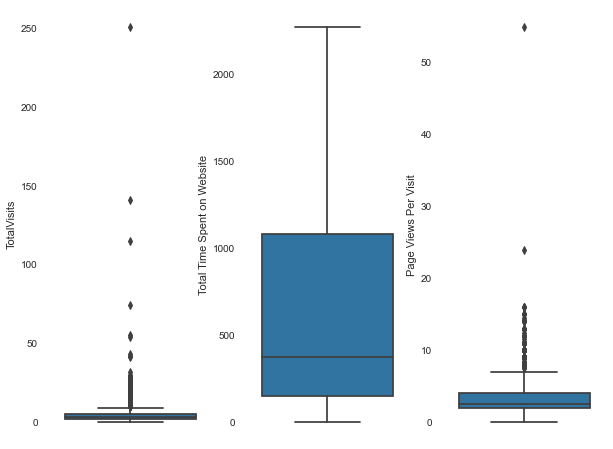

In [32]:
plt.figure(figsize=(10,8))
for i in enumerate(leads1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].columns):
    plt.subplot(1,3,i[0]+1)
    sbn.boxplot(y=leads1[i[1]])
    

In [33]:
for i in leads1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].columns:
    Q1=leads1[i].quantile(0.01)
    Q4=leads1[i].quantile(0.99)
    leads1[i][leads1[i]<=Q1]=Q1
    leads1[i][leads1[i]>=Q4]=Q4

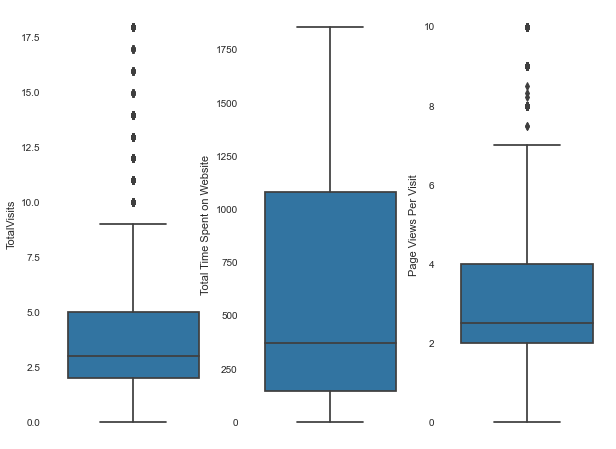

In [34]:
#After outlier treatment
plt.figure(figsize=(10,8))
for i in enumerate(leads1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].columns):
    plt.subplot(1,3,i[0]+1)
    sbn.boxplot(y=leads1[i[1]])
    

In [35]:
leads1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[0.25,.5,.75,.95,.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  7204.000000                  7204.000000           7204.000000
mean      4.220433                   606.788451              2.957512
std       3.160300                   543.310244              1.819994
min       0.000000                     0.000000              0.000000
25%       2.000000                   148.000000              2.000000
50%       3.000000                   371.000000              2.500000
75%       5.000000                  1083.000000              4.000000
95%      10.000000                  1602.000000              6.000000
99%      18.000000                  1858.000000             10.000000
max      18.000000                  1858.000000             10.000000

### Test and Train Split

In [36]:
# Putting feature variables to X
X=leads1.drop(columns='Converted')
# Putting response variable to y
y=leads1[['Converted']]

In [37]:
# Splitting the data into train and test
X_train,X_test, y_train, y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [38]:
print('X_test:',X_test.shape)
print('X_train:',X_train.shape)
print('y_test:',y_test.shape)
print('y_train:',y_train.shape)

X_test: (2162, 79)
X_train: (5042, 79)
y_test: (2162, 1)
y_train: (5042, 1)


### Rescaling the training variables

In [39]:
scalar=StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scalar.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [40]:
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1184     0.558611                    -0.113652              1.700770   
5379     2.125256                     0.180893             -0.103050   
6711    -0.068047                     1.785140              0.590727   
3019    -1.321364                    -1.119548             -1.629360   
990     -0.381377                    -0.763872             -0.796827   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1184                                    1                          0   
5379                                    1                          0   
6711                                    1                          0   
3019                                    0                          1   
990                                     0                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
1184                        0                           0   
5379                        0                           1   
6711                        0                           0   
3019                        0                           0   
990                         0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
1184                     0                   1                      0   
5379                     0                   0                      0   
6711                     0                   1                      0   
3019                     0                   0                      0   
990                      0                   0                      0   

      Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
1184                   0                       0                           0   
5379                   0                       0                           0   
6711                   0                       0                           0   
3019                   0                       0                           0   
990                    0                       0                           0   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
1184                              0                          0   
5379                              0                          0   
6711                              0                          0   
3019                              0                          0   
990                               0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
1184                      0                           0   
5379                      0                           0   
6711                      0                           0   
3019                      1                           0   
990                       0                           1   

      Lead Source_Social Media  Lead Source_WeLearn  \
1184                         0                    0   
5379                         0                    0   
6711                         0                    0   
3019                         0                    0   
990                          0                    0   

      Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
1184                             0                 0                 0   
5379                             0                 0                 0   
6711                             0                 0                 0   
3019                             0                 0                 0   
990                              0                 0                 0   

      Lead Source_testone  Lead Source_welearnblog_Home  \
1184                    0                             0   
5379                    0                             0   
6711                    0                             0   
3019                    0                             0   
990                     0     

### Looking at Correlations

In [41]:
corr=X_train.corr()
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
corr_matrix=corr.unstack().reset_index().dropna().sort_values(0,ascending=False)
#not dropping high correlation values here. Will do it in later steps using RFE
#column 0 is the correlation
corr_matrix

level_0  \
5242          Last Notable Activity_Email Marked Spam   
558                              Lead Source_Facebook   
1189                            Lead Source_Reference   
5322               Last Notable Activity_Email Opened   
6121               Last Notable Activity_Unsubscribed   
5961                   Last Notable Activity_SMS Sent   
5562   Last Notable Activity_Had a Phone Conversation   
5162         Last Notable Activity_Email Link Clicked   
5801    Last Notable Activity_Page Visited on Website   
5402             Last Notable Activity_Email Received   
6041                Last Notable Activity_Unreachable   
158                              Page Views Per Visit   
4983       A free copy of Mastering The Interview_Yes   
4980       A free copy of Mastering The Interview_Yes   
5721    Last Notable Activity_Olark Chat Conversation   
5082              Last Notable Activity_Email Bounced   
477                        Lead Source_Direct Traffic   
1505                     Lead Source_Welingak Website   
5634                   Last Notable Activity_Modified   
239               Lead Origin_Landing Page Submission   
950                        Lead Source_Organic Search   
4626                                City_Other Cities   
5767    Last Notable Activity_Page Visited on Website   
948                        Lead Source_Organic Search   
2686            Last Activity_Page Visited on Website   
5642                   Last Notable Activity_Modified   
5635                   Last Notable Activity_Modified   
6107               Last Notable Activity_Unsubscribed   
5640                   Last Notable Activity_Modified   
3509                Specialization_Finance Management   
237               Lead Origin_Landing Page Submission   
5926                   Last Notable Activity_SMS Sent   
3484                Specialization_Finance Management   
2845                           Last Activity_SMS Sent   
3026                       Last Activity_Unsubscribed   
5037       A free copy of Mastering The Interview_Yes   
4515                Specialization_Travel and Tourism   
3716         Specialization_Human Resource Management   
4594                                City_Other Cities   
4743                          City_Other Metro Cities   
5699    Last Notable Activity_Olark Chat Conversation   
3795            Specialization_IT Projects Management   
4977       A free copy of Mastering The Interview_Yes   
4664                 City_Other Cities of Maharashtra   
79                        Total Time Spent on Website   
5482  Last Notable Activity_Form Submitted on Website   
4979       A free copy of Mastering The Interview_Yes   
3953              Specialization_Marketing Management   
3242           Specialization_Business Administration   
3492                Specialization_Finance Management   
4822                           City_Thane & Outskirts   
4615                                City_Other Cities   
5034       A free copy of Mastering The Interview_Yes   
5229          Last Notable Activity_Email Marked Spam   
2227                  Last Activity_Email Marked Spam   
2618            Last Activity_Olark Chat Conversation   
2846                           Last Activity_SMS Sent   
159                              Page Views Per Visit   
3798            Specialization_IT Projects Management   
4427           Specialization_Supply Chain Management   
5927                   Last Notable Activity_SMS Sent   
4111             Specialization_Operations Management   
5036       A free copy of Mastering The Interview_Yes   
5033       A free copy of Mastering The Interview_Yes   
2060                      Last Activity_Email Bounced   
3818            Specialization_IT Projects Management   
5218          Last Notable Activity_Email Marked Spam   
2216                  Last Activity_Email Marked Spam   
5643                   Last Notable Activity_Modified   
4506                Specialization_Travel and Tourism   

In [42]:
#making correlation matrix after
#Since the colums are too many, we cant create visuals

### Model building

##### Feature Selection Using RFE

In [43]:
logreg=LogisticRegression()
rfe=RFE(logreg,15).fit(X_train,y_train)


In [44]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 37),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 38),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 10),
 ('Lead Source_Facebook', False, 41),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Live Chat', False, 61),
 ('Lead Source_NC_EDM', False, 9),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Pay per Click Ads', False, 32),
 ('Lead Source_Press_Release', False, 51),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Social Media', False, 27),
 ('Lead Source_WeLearn', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 58),
 ('Lead Source_blog', False, 15),
 ('Lead Source_testone', False, 39),
 ('Lead Source_welearnblog_Home', False, 25),
 ('Lead Source_youtubechannel', False, 

In [45]:
cols=X_train.columns[rfe.support_]
X_train.columns[rfe.support_]

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

#### Assessing the model with StatsModels

In [46]:
X_train_sm=sm.add_constant(X_train[cols])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

In [47]:
logm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5042
Model:                            GLM   Df Residuals:                     5026
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2395.0
Date:                Mon, 20 Jul 2020   Deviance:                       4790.0
Time:                        23:18:15   Pearson chi2:                 5.02e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.7927      0.106     -7.475      0.000      -1.001      -0.585
Total Time Spent on Website                        1.1053      0.039     28.707      0.000       1.030       1.181
Lead Origin_Lead Add Form                          2.4739      1.252      1.977      0.048       0.021       4.927
Lead Origin_Lead Import                            1.7321      0.514      3.370      0.001       0.725       2.739
Lead Source_Olark Chat                             1.6067      0.177      9.055      0.000       1.259       1.954
Lead Source_Reference                              1.7270      1.301      1.328      0.184      -0.822       4.276
Lead Source_Welingak Website                       2.3627      1.634      1.446      0.148      -0.839       5.565
Last Activity_Email Bounced                       -1.3512      0.328     -4.123      0.000      -1.994      -0.709
Last Activity_Email Opened                         0.9273      0.165      5.609      0.000       0.603       1.251
Last Activity_Had a Phone Conversation             0.6670      1.300      0.513      0.608      -1.881       3.215
Last Activity_SMS Sent                             1.1624      0.111     10.497      0.000       0.945       1.379
Last Notable Activity_Email Opened                -0.9655      0.186     -5.181      0.000      -1.331      -0.600
Last Notable Activity_Had a Phone Conversation    22.6143   1.25e+04      0.002      0.999   -2.44e+04    2.44e+04
Last Notable Activity_Modified                    -1.1016      0.110    -10.021      0.000      -1.317      -0.886
Last Notable Activity_Olark Chat Conversation     -1.1530      0.391     -2.946      0.003      -1.920      -0.386
Last Notable Activity_Unreachable                  1.5580      0.487      3.197      0.001       0.603       2.513
==================================================================================================================
"""

#### Checking VIFs

In [48]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                        Lead Origin_Lead Add Form  25.66
4                            Lead Source_Reference  21.45
7                       Last Activity_Email Opened   7.57
10              Last Notable Activity_Email Opened   7.26
5                     Lead Source_Welingak Website   5.21
8           Last Activity_Had a Phone Conversation   3.51
11  Last Notable Activity_Had a Phone Conversation   3.51
12                  Last Notable Activity_Modified   1.47
6                      Last Activity_Email Bounced   1.11
9                           Last Activity_SMS Sent   1.10
0                      Total Time Spent on Website   1.06
3                           Lead Source_Olark Chat   1.06
13   Last Notable Activity_Olark Chat Conversation   1.02
2                          Lead Origin_Lead Import   1.01
14               Last Notable Activity_Unreachable   1.00

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Lead Origin_Lead Add Form' has the highest VIF. So let's start by dropping that.

In [49]:
#Rebuilding the model after dropping high VIF value variable
cols=cols.drop('Lead Origin_Lead Add Form')
X_train_sm=sm.add_constant(X_train[cols])
logm2=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

In [50]:
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5042
Model:                            GLM   Df Residuals:                     5027
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2397.3
Date:                Mon, 20 Jul 2020   Deviance:                       4794.6
Time:                        23:18:16   Pearson chi2:                 5.02e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.7873      0.106     -7.437      0.000      -0.995      -0.580
Total Time Spent on Website                        1.1046      0.038     28.713      0.000       1.029       1.180
Lead Origin_Lead Import                            1.7283      0.514      3.363      0.001       0.721       2.736
Lead Source_Olark Chat                             1.6073      0.177      9.076      0.000       1.260       1.954
Lead Source_Reference                              4.1961      0.365     11.491      0.000       3.480       4.912
Lead Source_Welingak Website                       4.8317      1.054      4.584      0.000       2.766       6.897
Last Activity_Email Bounced                       -1.3550      0.328     -4.135      0.000      -1.997      -0.713
Last Activity_Email Opened                         0.9335      0.165      5.650      0.000       0.610       1.257
Last Activity_Had a Phone Conversation             0.6642      1.300      0.511      0.609      -1.883       3.212
Last Activity_SMS Sent                             1.1575      0.111     10.466      0.000       0.941       1.374
Last Notable Activity_Email Opened                -0.9737      0.186     -5.228      0.000      -1.339      -0.609
Last Notable Activity_Had a Phone Conversation    22.6104   1.24e+04      0.002      0.999   -2.44e+04    2.44e+04
Last Notable Activity_Modified                    -1.1040      0.110    -10.051      0.000      -1.319      -0.889
Last Notable Activity_Olark Chat Conversation     -1.1583      0.391     -2.961      0.003      -1.925      -0.391
Last Notable Activity_Unreachable                  1.5523      0.487      3.186      0.001       0.597       2.507
==================================================================================================================
"""

In [51]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6                       Last Activity_Email Opened  7.57
9               Last Notable Activity_Email Opened  7.26
7           Last Activity_Had a Phone Conversation  3.51
10  Last Notable Activity_Had a Phone Conversation  3.51
11                  Last Notable Activity_Modified  1.47
5                      Last Activity_Email Bounced  1.11
8                           Last Activity_SMS Sent  1.10
0                      Total Time Spent on Website  1.06
2                           Lead Source_Olark Chat  1.06
3                            Lead Source_Reference  1.03
12   Last Notable Activity_Olark Chat Conversation  1.02
1                          Lead Origin_Lead Import  1.01
4                     Lead Source_Welingak Website  1.01
13               Last Notable Activity_Unreachable  1.00

In [52]:
#high VIF variables are dropped, now dropping high p value variable
#Rebuilding the model after dropping high P value variable 'Last Notable Activity_Had a Phone Conversation'
cols=cols.drop('Last Notable Activity_Had a Phone Conversation')
X_train_sm=sm.add_constant(X_train[cols])
logm3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

In [53]:
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5042
Model:                            GLM   Df Residuals:                     5028
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2400.5
Date:                Mon, 20 Jul 2020   Deviance:                       4801.0
Time:                        23:18:16   Pearson chi2:                 5.03e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.7760      0.106     -7.344      0.000      -0.983      -0.569
Total Time Spent on Website                       1.1040      0.038     28.701      0.000       1.029       1.179
Lead Origin_Lead Import                           1.7302      0.514      3.366      0.001       0.723       2.738
Lead Source_Olark Chat                            1.6067      0.177      9.072      0.000       1.260       1.954
Lead Source_Reference                             4.1965      0.365     11.490      0.000       3.481       4.912
Lead Source_Welingak Website                      4.8295      1.054      4.582      0.000       2.764       6.895
Last Activity_Email Bounced                      -1.3565      0.328     -4.136      0.000      -1.999      -0.714
Last Activity_Email Opened                        0.9405      0.165      5.691      0.000       0.617       1.264
Last Activity_Had a Phone Conversation            2.6842      0.720      3.726      0.000       1.272       4.096
Last Activity_SMS Sent                            1.1499      0.111     10.404      0.000       0.933       1.367
Last Notable Activity_Email Opened               -0.9919      0.186     -5.330      0.000      -1.357      -0.627
Last Notable Activity_Modified                   -1.1222      0.110    -10.239      0.000      -1.337      -0.907
Last Notable Activity_Olark Chat Conversation    -1.1692      0.391     -2.989      0.003      -1.936      -0.403
Last Notable Activity_Unreachable                 1.5409      0.487      3.163      0.002       0.586       2.496
=================================================================================================================
"""

In [54]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6                      Last Activity_Email Opened  7.57
9              Last Notable Activity_Email Opened  7.26
10                 Last Notable Activity_Modified  1.46
5                     Last Activity_Email Bounced  1.11
8                          Last Activity_SMS Sent  1.10
0                     Total Time Spent on Website  1.06
2                          Lead Source_Olark Chat  1.06
3                           Lead Source_Reference  1.03
11  Last Notable Activity_Olark Chat Conversation  1.02
1                         Lead Origin_Lead Import  1.01
4                    Lead Source_Welingak Website  1.01
7          Last Activity_Had a Phone Conversation  1.00
12              Last Notable Activity_Unreachable  1.00

#### Everything seems fine, now we can begin with evaluation

In [55]:
y_train_pred=logm3.predict(X_train_sm).values.reshape(-1)

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [56]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values.reshape(-1), 'Converted_prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  CustID
0          1        0.278306    1184
1          1        0.359782    5379
2          1        0.758297    6711
3          1        0.965590    3019
4          0        0.141722     990

In [57]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted']=y_train_pred_final.Converted_prob.apply(lambda x: 1 if x>0.5 else 0)

In [58]:
# Let's check the overall accuracy.
print(accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['predicted']))

0.7740975803252678


### Confusion metrics and other measures

In [59]:
# Let's take a look at the confusion matrix again 
confusion = confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['predicted'])
confusion

array([[2665,  434],
       [ 705, 1238]])

In [60]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [61]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6371590324240864

In [62]:
# Let's see the specificity of our logistic regression model
TN / float(TN+FP)

0.8599548241368183

In [63]:
# Calculate false postive rate - predicting Converted when customer does not have converted
print(FP/ float(TN+FP))

0.14004517586318166


In [64]:
# positive predictive value 
print (TP / float(TP+FP))

0.7404306220095693


In [65]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7908011869436202


### Plotting the ROC Curve

An ROC curve demonstrates several things:

1. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
2. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
3. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [66]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

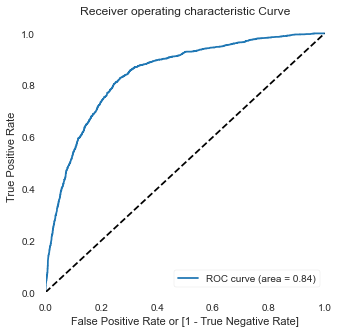

In [67]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Finding Optimal Cutoff Point

In [68]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          1        0.278306    1184          0    1    1    1    0    0    0   
1          1        0.359782    5379          0    1    1    1    1    0    0   
2          1        0.758297    6711          1    1    1    1    1    1    1   
3          1        0.965590    3019          1    1    1    1    1    1    1   
4          0        0.141722     990          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    1    1    0    0  
3    1    1    1    1  
4    0    0    0    0

In [69]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.385363     1.000000     0.000000
0.1   0.1  0.523403     0.980443     0.236851
0.2   0.2  0.699326     0.902213     0.572120
0.3   0.3  0.758826     0.850746     0.701194
0.4   0.4  0.775089     0.750901     0.790255
0.5   0.5  0.774098     0.637159     0.859955
0.6   0.6  0.761999     0.542975     0.899322
0.7   0.7  0.737207     0.420484     0.935786
0.8   0.8  0.700912     0.275347     0.967732
0.9   0.9  0.650536     0.106022     0.991933


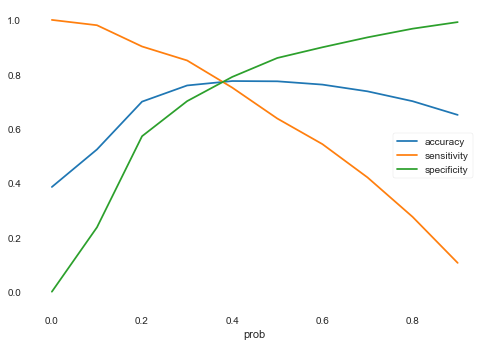

In [70]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.


In [71]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

Converted  Converted_prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          1        0.278306    1184          0    1    1    1    0    0    0   
1          1        0.359782    5379          0    1    1    1    1    0    0   
2          1        0.758297    6711          1    1    1    1    1    1    1   
3          1        0.965590    3019          1    1    1    1    1    1    1   
4          0        0.141722     990          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    1    1    0    0                1  
3    1    1    1    1                1  
4    0    0    0    0                0

In [72]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7731059103530346

In [73]:
#confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2371,  728],
       [ 416, 1527]])

In [74]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [75]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7858980957282553

In [76]:
# Let us calculate specificity
TN / float(TN+FP)

0.7650855114553081

In [77]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.23491448854469182


In [78]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6771618625277162


In [79]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8507355579476139


### Precision and recall tradeoff

In [80]:
y_train_pred_final.head()

Converted  Converted_prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          1        0.278306    1184          0    1    1    1    0    0    0   
1          1        0.359782    5379          0    1    1    1    1    0    0   
2          1        0.758297    6711          1    1    1    1    1    1    1   
3          1        0.965590    3019          1    1    1    1    1    1    1   
4          0        0.141722     990          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    1    1    0    0                1  
3    1    1    1    1                1  
4    0    0    0    0                0

In [81]:
p,r,thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_prob)

In [82]:
print(p,r,thresholds)

[0.39419761 0.39407468 0.39415466 ... 1.         1.         1.        ] [1.00000000e+00 9.99485332e-01 9.99485332e-01 ... 1.02933608e-03
 5.14668039e-04 0.00000000e+00] [0.02620179 0.02635879 0.0267287  ... 0.99795729 0.99813274 0.99824555]


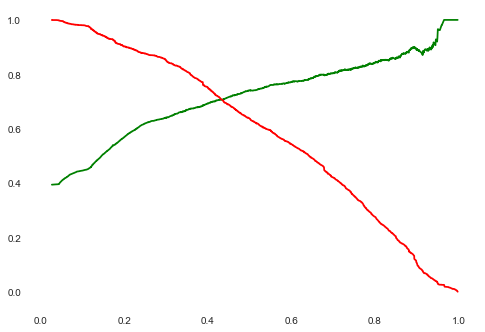

In [83]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Whether to Use ROC or Precision-Recall Curves?
Generally, the use of ROC curves and precision-recall curves are as follows:

1.ROC curves should be used when there are roughly equal numbers of observations for each class.

2.Precision-Recall curves should be used when there is a moderate to large class imbalance.

### Making predictions on the test set

In [84]:
# Rescaling the test variables
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scalar.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [85]:
X_test=X_test[cols]

In [86]:
X_test.head()

Total Time Spent on Website  Lead Origin_Lead Import  \
6430                    -0.573066                        0   
6592                    -0.119209                        0   
469                     -1.010252                        0   
3098                     0.818146                        0   
2905                    -0.098832                        0   

      Lead Source_Olark Chat  Lead Source_Reference  \
6430                       0                      0   
6592                       0                      0   
469                        0                      0   
3098                       0                      0   
2905                       0                      0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
6430                             0                            0   
6592                             0                            0   
469                              0                            0   
3098                             0                            0   
2905                             0                            0   

      Last Activity_Email Opened  Last Activity_Had a Phone Conversation  \
6430                           0                                       0   
6592                           1                                       0   
469                            0                                       0   
3098                           0                                       0   
2905                           0                                       0   

      Last Activity_SMS Sent  Last Notable Activity_Email Opened  \
6430                       1                                   0   
6592                       0                                   0   
469                        0                                   0   
3098                       1                                   0   
2905                       0                                   0   

      Last Notable Activity_Modified  \
6430                               0   
6592                               1   
469                                0   
3098                               0   
2905                               0   

      Last Notable Activity_Olark Chat Conversation  \
6430                                              0   
6592                                              0   
469                                               0   
3098                                              0   
2905                                              0   

      Last Notable Activity_Unreachable  
6430                                  0  
6592                                  0  
469                                   0  
3098                                  0  
2905                                  0

In [87]:
#adding constant to test variables
X_test_sm=sm.add_constant(X_test)

In [88]:
#making prediction
y_test_pred=logm3.predict(X_test_sm)

In [89]:
# Adding a Score (conversion_presiction*100)
y_test['Score']=y_test_pred*100

In [90]:
y_test['cust_id']=y_test.index

In [91]:
y_test.head()

Converted      Score  cust_id
6430          1  43.566554     6430
6592          0  25.173907     6592
469           0  13.109390      469
3098          0  78.195741     3098
2905          0  29.211706     2905

In [92]:
# Rearranging the columns
y_test = y_test[['cust_id','Converted','Score']]

In [93]:
#applying the thresholt/ optimal value 
y_test['final_predicted'] = y_test.Score.map(lambda x: 1 if x > 37 else 0)

In [94]:
y_test.head()

cust_id  Converted      Score  final_predicted
6430     6430          1  43.566554                1
6592     6592          0  25.173907                0
469       469          0  13.109390                0
3098     3098          0  78.195741                1
2905     2905          0  29.211706                0

### Evaluating the Test model

In [95]:
print('Accuracy of the model: ', metrics.accuracy_score(y_test.Converted,y_test.final_predicted))
confusion_test=metrics.confusion_matrix(y_test.Converted,y_test.final_predicted)
print('Confusion matrix of the model: \n', metrics.confusion_matrix(y_test.Converted,y_test.final_predicted))
TP=confusion_test[1,1]
TN=confusion_test[0,0]
FP=confusion_test[0,1]
FN=confusion_test[1,0]
print('Sensitivity of the model : ',(TP/float(TP+FN)))
print('Specificity of the model : ',(TN/float(TN+FP)))
print('Precision of the model : ',(TP/float(TP+FP)))


Accuracy of the model:  0.7756706753006476
Confusion matrix of the model: 
 [[1030  315]
 [ 170  647]]
Sensitivity of the model :  0.791921664626683
Specificity of the model :  0.7657992565055762
Precision of the model :  0.6725571725571725


### Model Predicted Conversion Ratio

In [96]:
sum(y_test.Score)/len(y_test.index) 

39.18701868345956

### Actual Conversion Ratio

In [97]:
sum(y_train.Converted)/len(y_train.index)

0.3853629512098374